# QCTO - Workplace Module

### Project Title: Africa Economic, Banking Systemic Crisis Data
#### Done By: Sharon Mokgadi Ramapuputla
#### Link to github repo: https://github.com/Sharonramapuputla/Workplace
#### Link to Trello board: https://trello.com/b/yQkSU6ca/workplace

© ExploreAI 2024



---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

**Context**

This dataset is a derivative of Reinhart et. al's Global Financial Stability dataset which can be found online at: https://www.hbs.edu/behavioral-finance-and-financial-stability/data/Pages/global.aspx.

The dataset will be valuable to those who seek to understand the dynamics of financial stability within the African context.

**- It is designed to analyze and understand the patterns, triggers, and outcomes of different financial crises in African countries over time.**

- This dataset is suitable for both **historical analysis** and **predictive modeling** related to economic crises in Africa.

**Content**

The dataset specifically focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe.

**Acknowledgements**

Reinhart, C., Rogoff, K., Trebesch, C. and Reinhart, V. (2019) Global Crises Data by Country.
[online] https://www.hbs.edu/behavioral-finance-and-financial-stability/data. Available at: https://www.hbs.edu/behavioral-finance-and-financial-stability/data/Pages/global.aspx [Accessed: 10 September 2024].

**Inspiration**

My inspiration stems from two questions: "Which factors are most associated with Systemic Crises in Africa?" And; "At which annual rate of inflation does an Inflation Crisis become a practical certainty?"

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [ ]:
# For data manupulation and analysis.
import pandas as pd
# For numerical  operations.
import numpy as np
# For data visualization.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#For machine learning and modeling tasks like train/test splitting, scalling, and modeling.
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import tensorflow as tf

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset from the CSV file
# Make sure to replace 'path_to_csv' with the actual file path
df = pd.read_csv('/content/african_crises.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Check the size of the dataset (number of rows and columns)
print("\nDataset Size (rows, columns):")
print(df.shape)

# Get an overview of the data types for each column
print("\nData Types and Missing Values:")
df.info()

# Check for missing values in the dataset
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Provide a statistical summary of numerical features
print("\nStatistical Summary of Numerical Columns:")
print(df.describe())


Dataset Preview:
   case  cc3  country  year  systemic_crisis  exch_usd  \
0     1  DZA  Algeria  1870                1  0.052264   
1     1  DZA  Algeria  1871                0  0.052798   
2     1  DZA  Algeria  1872                0  0.052274   
3     1  DZA  Algeria  1873                0  0.051680   
4     1  DZA  Algeria  1874                0  0.051308   

   domestic_debt_in_default  sovereign_external_debt_default  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   gdp_weighted_default  inflation_annual_cpi  independence  currency_crises  \
0                   0.0              3.441456             0                0   
1                   0.0             14.149140             0                0   
2        

### **Sources of the Data**:
The dataset titled **"Africa Economic, Banking, and Systemic Crisis Data"** was sourced from **Kaggle**, a popular platform for sharing datasets. It compiles information from various **financial and economic reports, databases**, and **public repositories** related to African countries' economic crises, banking failures, and other systemic issues.

### **Methods of Collection**:
The dataset was created by combining multiple data sources, such as:
- **Economic Reports**: Data from annual reports on GDP, inflation, and debt defaults published by global or regional organizations (e.g., World Bank, IMF).
- **Financial Institutions**: Records of banking crises and financial defaults from central banks or financial regulatory agencies.
- **Historical Records**: Information on currency and systemic crises might be extracted from historical datasets.
- **Manual Compilation**: Some datasets on economic crises may require manual gathering and validation from various academic papers, financial reports, and global databases.

There is no direct indication of APIs or web scraping used for data collection, but it's common for such datasets to be compiled from publicly available financial reports and repositories.

### **General Description of the Dataset**:

1. **Size**:
   - **Rows**: 1,059 rows
   - **Columns**: 14 columns
   
2. **Scope**:
   - This dataset focuses on the **economic crises** across different African countries. It includes information about systemic crises, currency crises, banking crises, and inflation crises from the 19th to the 21st century (years ranging from 1860 to 2014). The dataset covers data for multiple African countries, focusing on major economic and banking events that affected their financial stability.
   
3. **Types of Data**:
   - **Numerical Data**:
     - Year, exchange rate (exch_usd), domestic debt defaults, GDP defaults, inflation rates, etc.
     - Example columns: `exch_usd`, `domestic_debt_in_default`, `inflation_annual_cpi`.
     
   - **Categorical Data**:
     - Country names, crisis types (systemic, currency, inflation, banking).
     - Example columns: `cc3` (country code), `country`, `banking_crisis` (e.g., crisis or no_crisis).
   
   - **Binary Data** (0/1):
     - Presence or absence of crises such as systemic, currency, inflation crises.
     - Example columns: `systemic_crisis`, `currency_crises`, `inflation_crises`, `independence`.

### Summary:
- The dataset contains **1059 entries** of economic data focused on various crises that impacted African countries between 1860 and 2014.
- The data is mostly **numerical** (e.g., exchange rates, inflation, default rates), with some **categorical** (e.g., country names, crisis types) and **binary** (e.g., systemic crisis or not) values.
- It is designed to analyze and understand the patterns, triggers, and outcomes of different financial crises in African countries over time.

This dataset is suitable for both **historical analysis** and **predictive modeling** related to economic crises in Africa.

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [ ]:
# Import necessary library
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/african_crises.csv')

# Display the first few rows of the dataset to give a sense of what the raw data looks like.
df.head()


,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

# **Handle missing values**

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Remove rows with missing values (if needed)
df_cleaned = df.dropna()

# Alternatively, fill missing values with a specific value (e.g., 0 or the mean)
# df_cleaned = df.fillna(0) # or df.fillna(df.mean())

print("Missing values after cleaning:", df_cleaned.isnull().sum().sum())


Missing values after cleaning: 0


# **Data Type Conversion**

In [ ]:
# Convert 'banking_crisis' from text to binary
df['banking_crisis'] = df['banking_crisis'].apply(lambda x: 1 if x == 'crisis' else 0)

# Check if the conversion is successful
print(df[['banking_crisis']].head())

   banking_crisis
0               1
1               0
2               0
3               0
4               0


# **Handling Duplicates**

In [ ]:
# Check for duplicates
duplicate_rows = df.duplicated().sum()

# Remove duplicates if any
df_cleaned = df.drop_duplicates()

print(f"Duplicates found: {duplicate_rows}")
print(f"New dataset shape: {df_cleaned.shape}")

Duplicates found: 0
New dataset shape: (1059, 14)


# **Standardizing Text Values**

In [ ]:
# Convert text columns to lowercase (e.g., 'country')
df['country'] = df['country'].str.lower()

# Standardize specific text entries if needed
df['country'] = df['country'].replace({'drc': 'democratic republic of congo'})  # Example replacement

# **Outliers Detection**

In [ ]:
# Check for outliers using the Interquartile Range (IQR)
Q1 = df['inflation_annual_cpi'].quantile(0.25)
Q3 = df['inflation_annual_cpi'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df_cleaned = df[~((df['inflation_annual_cpi'] < (Q1 - 1.5 * IQR)) | (df['inflation_annual_cpi'] > (Q3 + 1.5 * IQR)))]

print("Shape after removing outliers:", df_cleaned.shape)

Shape after removing outliers: (951, 14)


# **Normalization or Scalling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scale the 'exch_usd' column to a range between 0 and 1
scaler = MinMaxScaler()
df['exch_usd_scaled'] = scaler.fit_transform(df[['exch_usd']])

print(df[['exch_usd', 'exch_usd_scaled']].head())

   exch_usd  exch_usd_scaled
0  0.052264         0.000070
1  0.052798         0.000071
2  0.052274         0.000070
3  0.051680         0.000069
4  0.051308         0.000069


In [ ]:
# Display the first few rows of the dataset
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis,exch_usd_scaled
0,1,DZA,algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,1,0.000070
1,1,DZA,algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,0,0.000071
2,1,DZA,algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,0,0.000070
3,1,DZA,algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,0,0.000069
4,1,DZA,algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,0,0.000069


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


In [ ]:
# Summary statistics
df.describe()

# Check for unique values in categorical columns
df['country'].value_counts()
df['banking_crisis'].value_counts()

,count
banking_crisis,
0,965
1,94


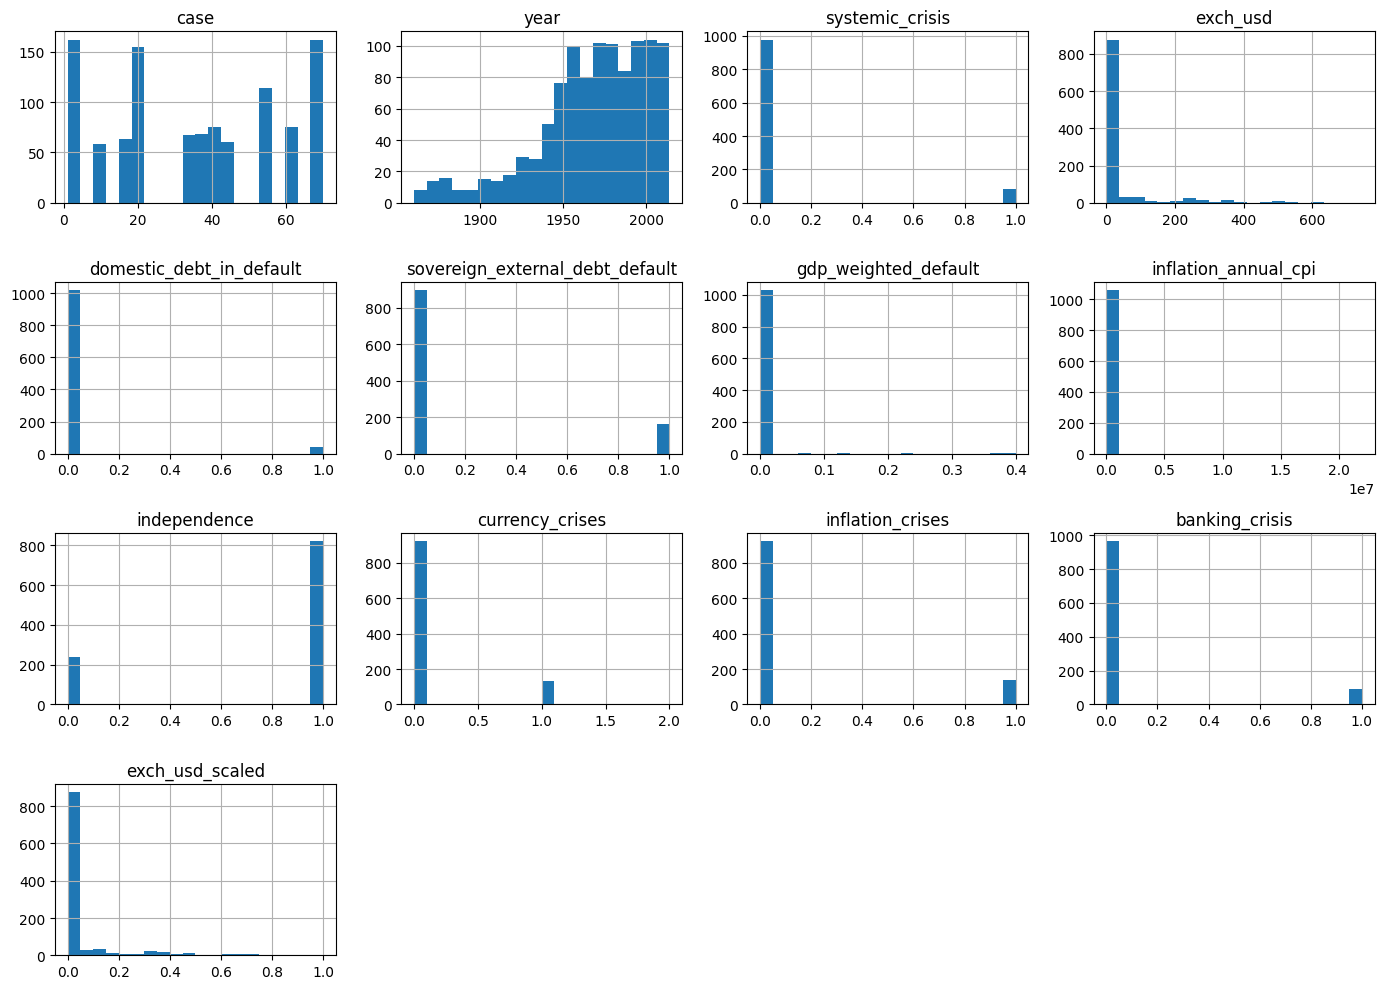

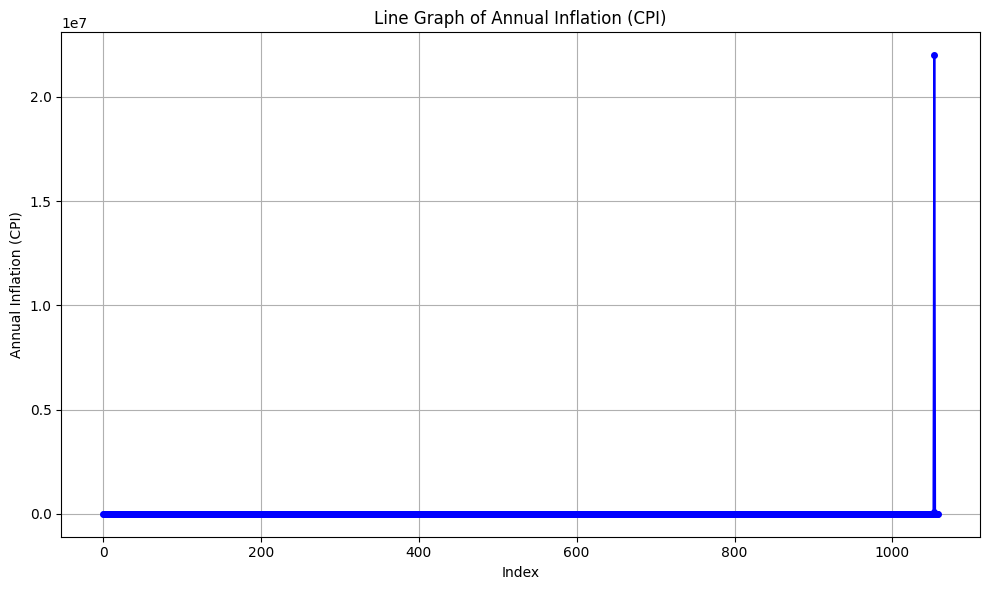

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
df.hist(bins=20, figsize=(14, 10))
plt.tight_layout()
plt.show()

# Line graph for 'inflation_annual_cpi'
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['inflation_annual_cpi'], marker='o', color='b', linestyle='-', markersize=4)
plt.title('Line Graph of Annual Inflation (CPI)')
plt.xlabel('Index')
plt.ylabel('Annual Inflation (CPI)')
plt.grid(True)
plt.tight_layout()
plt.show()


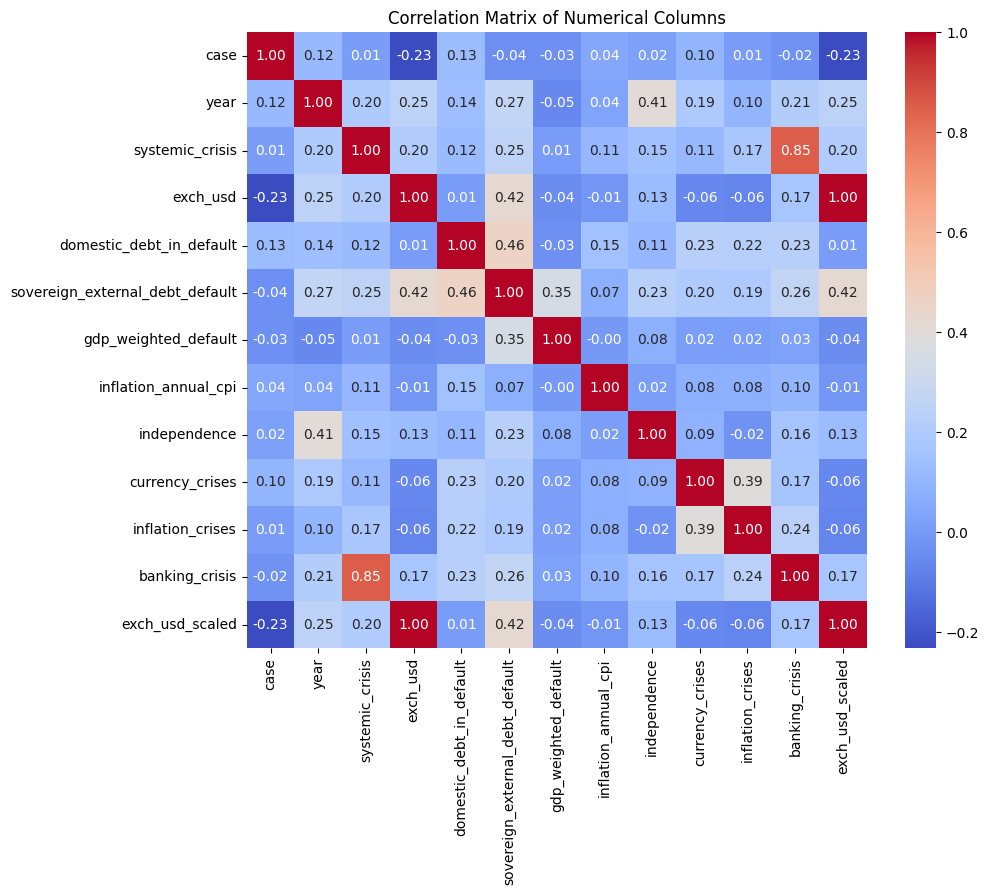

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

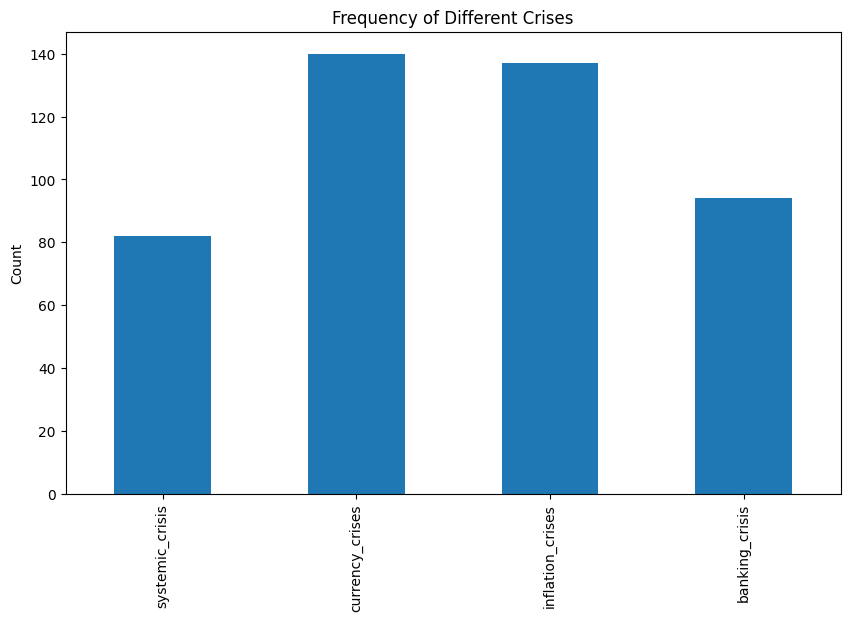

In [ ]:
# Define the crisis-related columns
crisis_cols = ['systemic_crisis', 'currency_crises', 'inflation_crises', 'banking_crisis']

# Now you can sum up the crisis columns and plot them
df[crisis_cols].sum().plot(kind='bar', figsize=(10, 6))
plt.title('Frequency of Different Crises')
plt.ylabel('Count')
plt.show()

# **Banking Crises**

In [ ]:
# Install Plotly package for creating interactive plots (this command is typically run in a Jupyter Notebook or similar environment)
!pip install plotly

# Import the Plotly Express module for creating quick and easy visualizations
import plotly.express as px

# Create a histogram using Plotly Express
# 'x' specifies the column to plot, which in this case is 'banking_crisis'
# The 'color' parameter adds color differentiation based on the values of 'banking_crisis'
# The 'color_discrete_map' defines a specific color mapping, assigning 'green' for 'crisis' and 'purple' for 'no_crisis'
# 'template' applies the 'plotly_dark' theme to the plot for a dark background style
px.histogram(df, x='banking_crisis', color='banking_crisis',
             color_discrete_map={'crisis': 'green', 'no_crisis': 'Purple'}, template='plotly_dark')



**1.Distribution of Banking Crisis Events:**

* The histogram shows the count of instances where a banking crisis (1)
occurred and where it didn't (0).
* The bar representing no_crisis (0) is significantly taller, it indicates that periods without a banking crisis are more frequent in this dataset.
* The crisis bar is short, it suggests that banking crises are not common in this dataset.

**2. Proportion Comparison:**

* By comparing the height of the green (Crises(1) and purple (no_crisis(0) bars, we can visually see how the occurrences of banking crises compare to periods without crises.

**3. Crisis vs. No Crisis:**

* The distinct color mapping (green for crisis and purple for no_crisis) helps easily differentiate between the two scenarios.

* The visual contrast allows you to quickly assess whether there is a balanced distribution or if one situation dominates the dataset.

**4. Insights into Periods of Stability:**

* A predominance of the no_crisis bar suggests that the dataset represents long periods of banking stability, punctuated by occasional crises.

* This is indicative of the effectiveness of financial regulation, economic stability, or external factors that influence the frequency of crises.

**5. Theme Choice:**

* The dark theme (plotly_dark) enhances the visual appeal and focuses attention on the color-coded crisis/no-crisis contrast, which may help when presenting or analyzing data in darker environments or for aesthetic preferences.

# **Country wise annual inflation rate over the years**

In [ ]:
# Create a line plot using Plotly Express with data sorted by the 'year' column.
fig = px.line(df.sort_values(by='year'), x='year',  # Sort values by 'year' to ensure the plot is ordered chronologically.

              # 'x' represents the year on the x-axis.
              y='inflation_annual_cpi',  # 'y' represents the annual inflation rate (CPI) on the y-axis.

              # 'animation_frame' specifies the column (in this case, 'country') that will create frames for animation.
              animation_frame='country',  # Creates an animated plot showing inflation data per country over time.

              # 'labels' customizes the axis label for 'inflation_annual_cpi', renaming it to "CPI Inflation Rate".
              labels={'inflation_annual_cpi': 'CPI inflation rate'},

              # 'animation_group' ensures that data is grouped by 'year' across the animation frames.
              animation_group='year',

              # 'color' assigns different colors to each country.
              color='country',

              # 'markers=True' adds markers at each data point on the line plot.
              markers=True,

              # 'template' applies a dark-themed background style ('plotly_dark').
              template='plotly_dark',

              # 'title' sets the title of the plot, using bold formatting for "Country wise Annual inflation rate over Years".
              title='<b> Country wise Annual inflation rate over Years')

# Hide the legend, since 'showlegend=False' removes the legend from the plot for cleaner visualization.
fig.update_traces(showlegend=False)


**1. Inflation Trends Across Countries:**

* The line plot helps in analyzing how the annual CPI inflation rate has evolved over time for each country.
* Steep rises or drops in the lines for particular countries indicate significant inflationary pressures or reductions in inflation in certain periods.
* Countries with more stable lines show less volatility in inflation, indicating more stable economic conditions.

**2. Comparative Analysis of Inflation Rates:**

* The color-coded lines for different countries allow for easy comparison across regions.

* We can identify countries with persistently high inflation over time versus those with more controlled or lower inflation rates.

* The plot reveals regional patterns, such as whether certain economic blocs (like developed vs. developing countries) have more inflationary stability or volatility.

**3. Time-Specific Events:**

* Certain global or local economic events (e.g., financial crises, policy changes, global recessions) are reflected in the animation.

* The animated transitions between years will helps observe when and how certain countries experience rapid changes in inflation.

**4. Country-Specific Outliers:**

* The animation allows for the identification of outliers, such as countries that have experienced hyperinflation or unusually low inflation rates relative to others.
* Countries with extreme volatility in inflation rates could indicate economic instability, and those consistently lower might suggest effective monetary policies.

**5. Markers for Key Data Points:**

* The markers highlight specific data points, making it easier to pinpoint when significant changes in inflation occurred for particular countries.
* By observing sudden changes at certain markers, We correlate specific years with possible economic reforms, shocks, or interventions.

**6. CPI Inflation Rate Labeling:**

* Customizing the label to "CPI Inflation Rate" ensures that users understand what is being measured on the y-axis, reinforcing that this visualization tracks consumer price inflation, a key indicator of the cost of living.

**7. Dynamic Insights Through Animation:**

* The animation feature allows us to see how inflation develops over time, making it easier to track temporal changes and identify key years of interest for specific countries.
* Watching how different countries' inflation rates evolve side by side in a dynamic fashion provides a more interactive way to study trends over time, compared to static plots.

**8. Dark Theme for Visual Focus:**

* The dark theme (plotly_dark) ensures the lines and markers stand out, improving the overall readability and allowing you to focus on the inflation trends without distraction from the background.

# **Country wise exchange rate over the years**

In [ ]:
# Create a line plot using Plotly Express with the data sorted by 'year'.
# Sorting by 'year' ensures the plot shows exchange rates chronologically.
fig = px.line(df.sort_values(by='year'), x='year',  # 'x' represents the years for the x-axis.

              # 'y' is the exchange rate (in USD) that will be plotted on the y-axis.
              y='exch_usd',

              # 'animation_frame' will create an animated plot, cycling through each country.
              animation_frame='country',  # Great way to visualize exchange rate movements for each country over time!

              # The 'labels' parameter customizes the axis label for 'exch_usd', renaming it to "Exchange Rate USD".
              labels={'exch_usd': 'exchange rate usd'},

              # 'animation_group' makes sure the data is grouped by 'year' during the animation.
              animation_group='year',

              # 'color' assigns a different color to each country, making them easier to distinguish in the plot.
              color='country',

              # 'markers=True' adds markers at each data point, making individual exchange rates more visible.
              markers=True,  # Nice touch! This makes it easier to track specific points.

              # 'template' applies a dark-themed style to the plot.
              template='plotly_dark',  # Dark theme gives it a clean, professional look!

              # 'title' sets the title of the plot, formatted in bold for emphasis.
              title='<b> Country wise Exchange Rate over Years')

# Hide the legend to make the plot cleaner by removing excessive details.
fig.update_traces(showlegend=False)  # Excellent! This keeps the plot focused and easier to read.




### 1. **Exchange Rate Trends Over Time:**
   - The line plot shows **how exchange rates fluctuate** for different countries over the years.
   - **Increasing lines** suggest that a country's currency has **weakened** against the USD (i.e., it takes more of the local currency to buy 1 USD).
   - **Decreasing lines** suggest that a country's currency has **strengthened** relative to the USD (i.e., the exchange rate is lower, indicating a stronger local currency).

### 2. **Volatility of Exchange Rates:**
   - Some countries may have **more volatile exchange rates**, where the line shows frequent sharp spikes or dips, indicating frequent fluctuations in currency value.
   - **Countries with stable lines** represent economies with more consistent exchange rates, possibly due to **fixed exchange rate systems** or **stable economic conditions**.

### 3. **Comparative Currency Strength:**
   - The **color-coded lines** for each country allow easy comparison of currency strength over time.
   - We can identify countries whose currencies are **persistently weak** (where the exchange rate continues to increase) compared to those whose currencies are **stable or appreciating** (decreasing exchange rates).

### 4. **Effects of Global and Local Economic Events:**
   - The animation will help identify **key events** that have affected exchange rates for multiple countries at the same time. For example:
     - **Global financial crises** (such as in 2008 or during the COVID-19 pandemic) may show sudden shifts in exchange rates.
     - **Local economic crises** (e.g., hyperinflation in specific countries) might result in a steep increase in the exchange rate.
     - **Changes in government policies** like devaluation or revaluation of a currency may also be visible as sudden changes in the plot.

### 5. **Regional Currency Dynamics:**
   - Watching the animation over time could reveal **regional patterns**, like whether countries in certain regions have exchange rates that move in tandem, possibly due to shared economic policies, trading relationships, or exposure to the same economic shocks.
   - We can see whether currencies in **developed countries** exhibit more stability compared to **emerging markets**, which may experience more dramatic swings.

### 6. **Markers for Key Data Points:**
   - The **markers** make it easier to pinpoint significant changes in exchange rates for individual countries.
   - If the markers are clustered tightly over a short period, it may indicate a **rapid devaluation** or appreciation of the currency.

### 7. **Custom Labels and Titles:**
   - The label "Exchange Rate USD" provides clear context for what is being measured on the y-axis, making it easy to understand that this plot tracks the rate of exchange for each country relative to the USD.
   - The title, "Country-wise Exchange Rate over Years," gives a clear indication of what the plot is showing—helpful for audience interpretation.

### 8. **Dark Theme for Better Visual Clarity:**
   - The **dark theme** ensures that the colored lines and markers stand out more clearly against the background, improving overall readability and allowing viewers to focus on the data.

### 9. **Legend Suppression:**
   - By removing the legend, we make the plot **less cluttered**, which can be helpful when there are many countries to compare. Each country’s line color is still distinct, making identification straightforward.

### Overall Analysis:
This plot allows us to **track how currencies from different countries change relative to the USD over time**, identify trends in currency strength or weakness, and see how global or local events impact exchange rates. The animation provides a dynamic way to explore **temporal changes** and uncover patterns in currency stability, making this visualization a powerful tool for understanding global currency movements.


# **Inflation rate in every country**

In [ ]:
# Create an animated bar plot using Plotly Express to visualize inflation data.
# 'df' is the DataFrame that contains the data.

# 'x' specifies the x-axis, which in this case represents each 'country'.
# 'y' specifies the y-axis, which represents the annual CPI inflation rate.
px.bar(df, x='country', y='inflation_annual_cpi',

       # 'color' assigns a color scale based on the CPI inflation rate, giving visual distinction based on inflation levels.
       color='inflation_annual_cpi',

       # 'animation_frame' creates an animated chart that changes by 'year', showing inflation rate changes over time.
       animation_frame='year',

       # 'text' adds labels directly on top of each bar, showing the exact inflation rate for better readability.
       text='inflation_annual_cpi',

       # 'labels' customizes the y-axis label, renaming 'inflation_annual_cpi' to 'CPI inflation rate'.
       labels={'inflation_annual_cpi': 'CPI inflation rate'},

       # 'animation_group' groups the data by 'country' across different frames in the animation, keeping each country's data consistent.
       animation_group='country',

       # 'template' applies the 'plotly_dark' theme to give the plot a dark background style.
       template='plotly_dark',

       # 'title' sets the title of the plot, using bold formatting to emphasize "Inflation rate in every countries".
       title='<b> Inflation rate in every countries')

# This code generates an interactive, animated bar plot, allowing users to see how inflation rates in various countries evolve over time with color scaling for better data visibility.





### 1. **Comparative Inflation Rates by Country:**
   - The bar chart helps **compare the inflation rates across different countries** in a given year.
   - Taller bars represent **higher inflation rates**, indicating countries experiencing greater increases in consumer prices.
   - **Shorter bars** indicate countries with relatively **stable or lower inflation**, reflecting better control over consumer price levels.

### 2. **Inflation Trends Over Time:**
   - The animation by year (`animation_frame='year'`) allows for an **analysis of inflation trends over time**, showing how inflation changes year after year for each country.
   - We can see which countries have had **increasing inflation rates** over the years and which have been able to maintain **stable or declining inflation**.

### 3. **Global and Regional Economic Events:**
   - **Global economic events**, such as recessions, financial crises, or pandemics, are reflected in sudden spikes in inflation for multiple countries at the same time.
   - Regional events or **country-specific economic crises** (like hyperinflation in certain countries) could also be observed, indicated by rapid increases in the bar heights for specific countries.

### 4. **Country-Specific Outliers:**
   - The bar chart highlights **outliers**, such as countries experiencing extreme inflation compared to the global average.
   - Countries with **hyperinflation** or unusually high inflation will stand out clearly with much taller bars, drawing attention to potential economic instability.

### 5. **Inflation Rate Labeling:**
   - The use of **text labels on each bar** ensures that viewers can directly see the exact inflation rates for each country, without needing to hover over the chart.
   - This makes it easier to **track and compare precise inflation values** year by year.

### 6. **Color Coding for Visual Impact:**
   - The **color gradient based on the inflation rate** (`color='inflation_annual_cpi'`) enhances the visual distinction between low and high inflation.

### 7. **Inflation Hotspots Over Time:**
   - As the animation progresses, it’s easy to identify **countries that consistently show high inflation** over several years, indicating persistent economic challenges or weaker monetary policies.
   - Countries that **move from low to high inflation** over time suggests the onset of economic challenges or weakening currency.
   - Conversely, countries that **stabilize or reduce inflation** have implemented effective policies to control inflation.

### 8. **Insights Into Policy Effectiveness:**
   - By analyzing trends, we can infer the **effectiveness of monetary policies** in different countries.
   - Countries that experience **stable inflation rates** despite global economic fluctuations may be implementing **sound monetary policies** or benefiting from stable economic environments.
   - Countries with **volatile or rising inflation rates** may be struggling with economic instability or inflationary pressures.

### 9. **Regional Inflation Patterns:**
   - **Regional analysis** reveals whether inflationary patterns are **similar across neighboring countries** due to shared economic environments or policy influences.
   - For example, countries in the same region might experience simultaneous spikes or declines in inflation due to common economic factors, such as trade, geopolitical issues, or shared economic shocks.

### Overall Analysis:
The animated bar plot provides a **dynamic, easy-to-interpret visual of inflation trends** across countries over time. It allows for:
- **Yearly tracking of inflation rates** and the identification of significant changes,
- **Comparison between countries**, revealing which economies are stable and which face inflationary challenges,
- Identification of **global or regional inflation trends** influenced by events such as financial crises or political instability.

This visualization is an excellent tool for tracking the **global inflation landscape**, making it easier to **spot patterns, outliers, and important economic shifts** over time.

# **Exchange rate in countries in Africa countries**

In [ ]:
# Create an animated choropleth map using Plotly Express, visualizing exchange rates for African countries over time.
# 'df' is the DataFrame that contains the data, and 'year' is used to animate the plot.

# Sort the DataFrame by 'year' to ensure the animation progresses chronologically.
px.choropleth(df.sort_values(by='year'),

              # 'locations' specifies the column 'cc3', which contains the 3-character country codes (ISO Alpha-3 codes)
              # to map the countries on the choropleth.
              locations='cc3',

              # 'animation_frame' creates the animation over time, with each frame representing a different 'year'.
              animation_frame='year',

              # 'labels' customizes the axis and tooltips labels for 'exch_usd', 'cc3' (country code), and 'country'.
              labels={'exch_usd': 'exchange rate usd', 'cc3': 'code', 'country': 'country'},

              # 'animation_group' ensures that data for the same 'country' is grouped consistently across animation frames.
              animation_group='country',

              # 'color' sets the column 'exch_usd' (exchange rate in USD) to be represented by color on the map.
              color='exch_usd',

              # 'color_continuous_scale' applies the 'Plasma' sequential color scale, which maps exchange rate values
              # to a continuous range of colors.
              color_continuous_scale=px.colors.sequential.Plasma,

              # 'title' sets the title of the map, using bold formatting for "Exchange Rate of countries in Africa continent".
              title='<b>Exchange Rate of countries in Africa continent',

              # 'template' applies the 'plotly_dark' theme, giving the map a dark background with contrasting data colors.
              template='plotly_dark')


The animated **choropleth map** visualizes exchange rates (in USD) for African countries over time, providing valuable insights into currency fluctuations across the continent. Here's an analysis of the findings you can derive from the map:

### 1. **Exchange Rate Fluctuations Across African Countries:**
   - The map shows how **exchange rates change over time** in various African countries, with different colors representing different exchange rate values.
   - **Lighter colors** represent countries with **stronger currencies** relative to the USD (lower exchange rates), while **darker colors** indicate **weaker currencies** (higher exchange rates).

### 2. **Trends in Currency Strength and Weakness:**
   - Countries whose colors **darken over time** are experiencing **currency depreciation** relative to the USD, indicating a weakening local currency.
   - Countries that maintain **lighter colors** across the years reflect **more stable currencies** that are relatively stronger against the USD.
   - A country **shifts from light to dark colors** rapidly, it indicateS a period of **economic instability** or sharp currency depreciation.

### 3. **Impact of Global and Local Economic Events:**
   - The animation allows for an analysis of how **global economic events** (e.g., financial crises, global recessions) impact exchange rates across African countries.
   - **Local events**, such as **political instability**, **economic reforms**, or **inflationary pressures**, can be observed by noting sudden changes in color for individual countries.

### 4. **Regional Currency Patterns:**
   - The choropleth map highlights **regional patterns** in exchange rates. For instance, neighboring countries with similar economic policies or shared currency zones (such as those in the West African Economic and Monetary Union) may exhibit similar color trends.
   - There are **clusters of countries** with similar currency behaviors due to common economic environments or **trading relationships**.

### 5. **Volatility and Stability:**
   - The **color transitions over time** help identify countries with more **volatile currencies**. If a country frequently changes colors, it suggests frequent fluctuations in its exchange rate, which could indicate economic instability.
   - Conversely, countries that **maintain consistent colors** over the years reflect more **stable exchange rates**, suggesting better control over inflation and more stable monetary policy.

### 6. **Economic Policies and Reforms:**
   - Countries that show **improvement or stabilization** (i.e., their colors lighten over time) might be implementing **effective economic policies** that strengthen their currencies relative to the USD.
   - We can see the impact of currency **devaluation policies** or **hyperinflation** in countries where the color darkens rapidly.

### 7. **Regional Effects of Currency Depreciation:**
   - The **color-continuous scale** (using the Plasma color palette) allows for the identification of extreme cases of **currency depreciation** in some African countries.
   - Some regions may experience **synchronized depreciation**, possibly due to **common regional challenges**, such as economic downturns, political crises, or shared economic dependencies (e.g., oil exports).

### 8. **Currency Exchange Rates Over the Years:**
   - By watching the animation, we can see how **currency exchange rates evolve year by year**, allowing for the identification of specific **periods of change** for each country.
   - Certain years may stand out due to **sudden shifts** in exchange rates for multiple countries, potentially indicating the impact of **global economic trends** (e.g., commodity price crashes, financial crises).

### 9. **Choropleth Map for Visual Insight:**
   - The **dark theme** and the **Plasma color scale** provide an intuitive and visually engaging way to track currency exchange rate movements, making it easy to spot **countries in economic distress** and those that have **more stable currencies**.
   - The animation allows for a dynamic understanding of **temporal changes** in exchange rates, providing insights into both **short-term fluctuations** and **long-term trends**.

### Overall Analysis:
This choropleth map offers a **comprehensive visual representation** of how exchange rates fluctuate across African countries over time. It provides insights into:
- **Which countries have stable or volatile currencies,**
- The **impact of local and global economic events** on currency strength,
- Regional patterns of **currency behavior** and **economic stability** in Africa.

This analysis can help policymakers, economists, and financial analysts understand **economic conditions** across Africa and identify countries that may require **economic intervention** or are successfully managing their exchange rates.

# **Annual inflation rate of countries in Africa continent**

In [ ]:
# Create an animated choropleth map using Plotly Express to visualize the annual CPI inflation rate
# for African countries over time. The data is sorted by 'year' to ensure chronological animation.

px.choropleth(df.sort_values(by='year'),

              # 'locations' specifies the column 'cc3', which contains the 3-character ISO Alpha-3 country codes.
              locations='cc3',

              # 'animation_frame' creates an animated map where each frame represents a different 'year',
              # showing how the inflation rate evolves over time.
              animation_frame='year',

              # 'labels' customizes the labels that appear in the tooltips when hovering over the map, renaming
              # 'inflation_annual_cpi' to 'CPI inflation rate', 'cc3' to 'code', and 'country' to 'country'.
              labels={'inflation_annual_cpi': 'CPI inflation rate', 'cc3': 'code', 'country': 'country'},

              # 'animation_group' ensures the data is grouped by 'country' across animation frames, maintaining
              # consistency in tracking each country's inflation rate over time.
              animation_group='country',

              # 'color' sets the CPI inflation rate to be represented by color on the map.
              # This allows the inflation rate to be visualized using a color scale.
              color='inflation_annual_cpi',

              # 'color_continuous_scale' applies the 'thermal' sequential color scale,
              # which maps different inflation rates to colors ranging from cool to warm tones.
              color_continuous_scale=px.colors.sequential.thermal,

              # 'title' sets the title of the plot, emphasizing "Annual inflation rate of countries in Africa continent"
              # using bold formatting.
              title='<b>Annual inflation rate of countries in Africa continent',

              # 'template' applies the 'plotly_dark' theme, which provides a dark background and contrasting colors for the map.
              template='plotly_dark')




### 1. **Visualizing Inflation Across Africa:**
   - The map highlights **country-specific inflation rates**, with different colors representing varying levels of inflation.
   - **Cooler colors** represent **lower inflation rates**, indicating more stable price levels, while **warmer colors** represent **higher inflation rates**, signaling rising consumer prices and potential economic instability.

### 2. **Tracking Inflation Trends Over Time:**
   - The animation allows for an examination of **inflation trends** in African countries across different years.
   - Countries with **increasingly warmer colors** over time are experiencing **rising inflation rates**, which may indicate economic instability, currency devaluation, or other inflationary pressures.
   - Countries with **cooler colors** over time may have **stable or declining inflation**, signaling effective inflation control and economic stability.

### 3. **Identifying Economic Outliers:**
   - The map helps spot **outliers** in terms of inflation. Countries with **persistent high inflation** will show consistently dark or warm colors, while countries with **low inflation** will maintain cooler colors.
   - Countries that show **rapid changes in color** might have experienced economic shocks, sudden inflationary pressures, or policy shifts that drastically affected inflation rates.

### 4. **Global and Local Economic Factors:**
   - We observe the effects of **global economic events** on African inflation rates. For example, **global commodity price changes** or **worldwide recessions** could lead to simultaneous inflation increases across several countries.
   - **Local economic crises** (e.g., political instability, economic mismanagement) can cause sharp increases in inflation for individual countries, which would be reflected in sudden color changes for those countries.

### 5. **Regional Patterns and Groupings:**
   - The choropleth map also allows for the identification of **regional inflation patterns**. For instance, countries within the same economic zones or with strong economic ties may exhibit **similar inflation trends** over time.
   - If several neighboring countries exhibit similar inflation behavior (color trends), it could suggest **regional economic trends** or shared economic challenges.

### 6. **Volatility of Inflation Rates:**
   - Countries with **frequent shifts in color** may have **volatile inflation rates**, suggesting economic instability, ineffective monetary policies, or high sensitivity to external economic forces.
   - Countries with **stable color patterns** over time suggest **consistent inflation control**, potentially through effective economic policies or stable economic conditions.

### 7. **Policy and Economic Stability Indicators:**
   - Countries that maintain **low inflation rates** over time (consistent cool colors) may be practicing sound fiscal and monetary policies, reflecting economic stability.
   - Countries with **high and rising inflation** (warmer colors) may need to focus on controlling inflationary pressures through policy reforms, as sustained inflation can lead to **reduced purchasing power** and **economic hardship** for citizens.

### 8. **Historical Economic Insights:**
   - As the map animates through different years, it provides historical insights into periods of **high or low inflation** across Africa. This can help identify **turning points** where specific economic policies, external shocks, or global economic events affected inflation in various countries.

### 9. **Identifying Inflation Hotspots:**
   - **Inflation hotspots** will stand out clearly on the map, with countries experiencing extreme inflation rates shown in the **darkest or warmest colors**.
   - These hotspots may highlight countries going through **hyperinflation**, extreme economic crises, or currency devaluation.

### Overall Analysis:
This animated choropleth map offers a **comprehensive visual tool** to analyze inflation rates across Africa over time. Key insights include:
- **Which countries face persistent inflation challenges** and which have managed to stabilize their economies.
- The impact of **global and local economic factors** on inflation rates.
- Identification of **regional inflation patterns** and **outlier countries** that may require economic intervention.

This visualization is useful for policymakers, economists, and analysts to track **inflation trends**, **economic stability**, and the **effectiveness of fiscal and monetary policies** in African countries.

**Heatmap**

In [ ]:
import plotly.express as px

# Example columns: 'country', 'year', 'inflation_annual_cpi'

# Create a pivot table to convert data into a matrix format suitable for a heatmap
heatmap_data = df.pivot(index='country', columns='year', values='inflation_annual_cpi')

# Generate the heatmap using Plotly Express
fig = px.imshow(heatmap_data,
                labels=dict(x="Year", y="Country", color="CPI Inflation Rate"),  # Axis and color bar labels
                color_continuous_scale="thermal",  # Color scale for the heatmap
                title="<b>Heatmap of Annual Inflation Rate by Country and Year</b>",  # Title
                template="plotly_dark"  # Apply dark theme for better contrast
               )

# Display the heatmap
fig.show()


---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


# Problem Definition

The objective is to predict whether a banking crisis will occur using the available features in the dataset. This is a binary classification problem, as the target variable (banking_crisis) has two possible outcomes: 1 (crisis) and 0 (no_crisis).

# Data Preparation

Before training the model, we need to:

- Select relevant features.
- Perform any necessary feature engineering (e.g., encoding categorical features).
- Split the data into training and testing sets.

# **Feature Selection and Engineering**

Let's select the key features and handle any categorical variables:

- **Features**: Include numerical and binary indicators like systemic_crisis, currency_crises, inflation_crises, gdp_weighted_default, inflation_annual_cpi, etc.
- **Target**: banking_crisis (1 or 0).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define feature columns
feature_cols = ['systemic_crisis', 'currency_crises', 'inflation_crises',
                'gdp_weighted_default', 'inflation_annual_cpi', 'exch_usd']

# Target variable
target = 'banking_crisis'

# Split the data into features and target
X = df[feature_cols]
y = df[target]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (important for models like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Model Selection and Training**  

We'll try several models suitable for classification:

- **Logistic Regression**: A simple yet effective linear model.
- **Random Forest**: A powerful ensemble-based classifier.
- **Gradient Boosting**: A boosting method for more complex decision boundaries.


**We will use scikit-learn to build, train, and evaluate these models.**

**1. Logistic Regression**

Logistic Regression is a good baseline model for binary classification.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the model
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_logreg = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       293
           1       0.92      0.88      0.90        25

    accuracy                           0.98       318
   macro avg       0.95      0.94      0.94       318
weighted avg       0.98      0.98      0.98       318



**2. Random Forest Classifier**

Random Forest is a tree-based ensemble model that usually performs well for a wide range of problems.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       293
           1       0.85      0.92      0.88        25

    accuracy                           0.98       318
   macro avg       0.92      0.95      0.94       318
weighted avg       0.98      0.98      0.98       318



**3. Gradient Boosting Classifier**

Gradient Boosting is another ensemble method that often improves accuracy, especially with complex datasets.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_clf.predict(X_test)

# Evaluate the model
print("Gradient Boosting Performance:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Performance:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       293
           1       0.83      0.96      0.89        25

    accuracy                           0.98       318
   macro avg       0.91      0.97      0.94       318
weighted avg       0.98      0.98      0.98       318



## **Model Parameters:**

- Logistic Regression: random_state=42 ensures reproducibility.
- Random Forest: n_estimators=100 defines the number of trees in the forest.
- Gradient Boosting: n_estimators=100 defines the number of boosting stages

###**Feature Importance (for Tree-based models)**

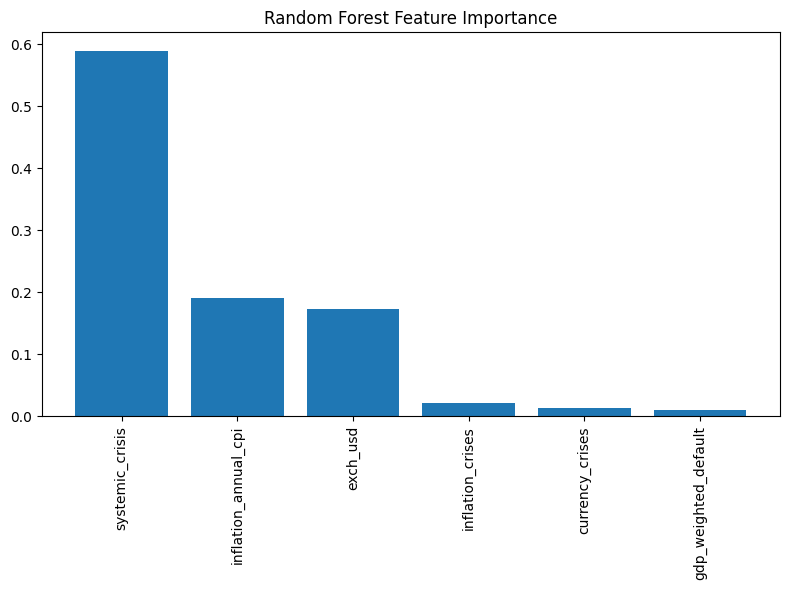

In [ ]:
# Random Forest Feature Importance
importances_rf = rf_clf.feature_importances_
sorted_indices_rf = np.argsort(importances_rf)[::-1]

# Plot the feature importance
plt.figure(figsize=(8,6))
plt.title("Random Forest Feature Importance")
plt.bar(range(X.shape[1]), importances_rf[sorted_indices_rf], align='center')
plt.xticks(range(X.shape[1]), [feature_cols[i] for i in sorted_indices_rf], rotation=90)
plt.tight_layout()
plt.show()


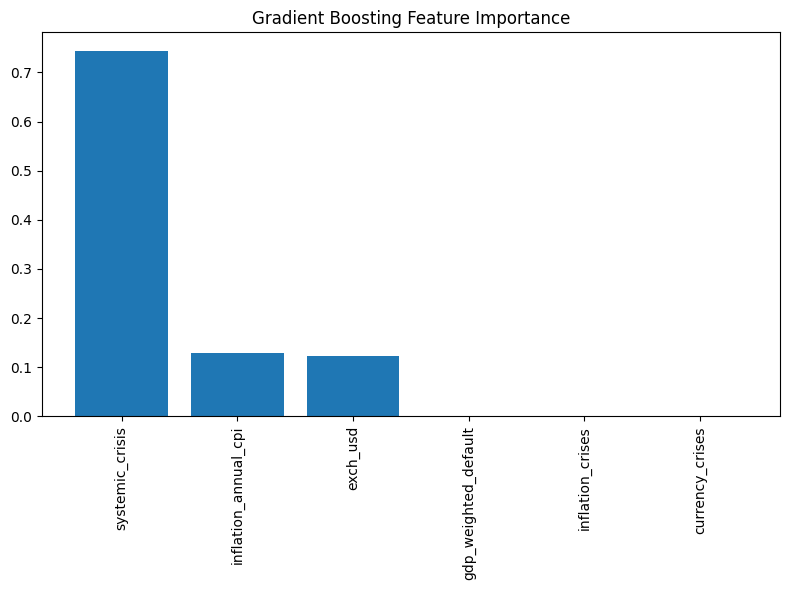

In [ ]:
# Gradient Boosting Feature Importance
importances_gb = gb_clf.feature_importances_
sorted_indices_gb = np.argsort(importances_gb)[::-1]

# Plot the feature importance
plt.figure(figsize=(8,6))
plt.title("Gradient Boosting Feature Importance")
plt.bar(range(X.shape[1]), importances_gb[sorted_indices_gb], align='center')
plt.xticks(range(X.shape[1]), [feature_cols[i] for i in sorted_indices_gb], rotation=90)
plt.tight_layout()
plt.show()


---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

The purpose of this section is to evaluate and validate the effectiveness and accuracy of the models we trained (Logistic Regression, Random Forest, and Gradient Boosting) using various performance metrics and validation techniques. The primary metrics we'll focus on are:

- **Accuracy**: The proportion of correctly classified instances (both crises and no_crises).
- **Precision**: Out of the predicted crises, how many were actual crises.
- **Recall**: Out of the actual crises, how many were predicted correctly.
- **F1-Score**: The harmonic mean of precision and recall, useful when there is class imbalance.

We'll also apply **cross-validation** to get a more reliable estimate of model performance, rather than relying on a single train/test split

# 1. **Train/Test Split**

We already split the dataset into a training set (70%) and a testing set (30%) to evaluate the models' performance.

**Evaluate Models Using Classification Report**

The classification_report function from sklearn outputs accuracy, precision, recall, and F1-score for both classes (crisis and no_crisis). Here's how to calculate and print the performance metrics for the models we trained:

# **Logistic Regression Evaluation:**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg))
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.2f}")


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       293
           1       0.92      0.88      0.90        25

    accuracy                           0.98       318
   macro avg       0.95      0.94      0.94       318
weighted avg       0.98      0.98      0.98       318

Accuracy: 0.98


# **Random Forest Evaluation:**

In [ ]:
# Random Forest
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       293
           1       0.85      0.92      0.88        25

    accuracy                           0.98       318
   macro avg       0.92      0.95      0.94       318
weighted avg       0.98      0.98      0.98       318

Accuracy: 0.98


# **Gradient Boasting Evalutalion**

In [ ]:
# Gradient Boosting
print("Gradient Boosting Performance:")
print(classification_report(y_test, y_pred_gb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.2f}")


Gradient Boosting Performance:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       293
           1       0.83      0.96      0.89        25

    accuracy                           0.98       318
   macro avg       0.91      0.97      0.94       318
weighted avg       0.98      0.98      0.98       318

Accuracy: 0.98


# **2. Cross-Validation**

Cross-validation ensures the model is robust and performs well on different subsets of the data. We'll use K-Fold Cross-Validation, where the dataset is split into K smaller sets (folds). Each model is trained on K-1 folds and validated on the remaining fold. This process is repeated K times with each fold used as the validation set once.

**Applying 5-Fold Cross-Validation:**

In [ ]:
from sklearn.model_selection import cross_val_score

# Logistic Regression Cross-Validation
log_reg_cv = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression Cross-Validation Accuracy: {log_reg_cv.mean():.2f}")

# Random Forest Cross-Validation
rf_cv = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Random Forest Cross-Validation Accuracy: {rf_cv.mean():.2f}")

# Gradient Boosting Cross-Validation
gb_cv = cross_val_score(gb_clf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Gradient Boosting Cross-Validation Accuracy: {gb_cv.mean():.2f}")


Logistic Regression Cross-Validation Accuracy: 0.97
Random Forest Cross-Validation Accuracy: 0.98
Gradient Boosting Cross-Validation Accuracy: 0.97


Why Cross-Validation?

- Reduced Variance: Cross-validation reduces the variance of the accuracy estimate, as the model is tested on different subsets of the data.
- More Reliable: By averaging the performance across multiple folds, we get a more reliable picture of how the model will generalize to unseen data.

# **3. Confusion Matrix**

The confusion matrix provides a more detailed breakdown of correct and incorrect classifications.

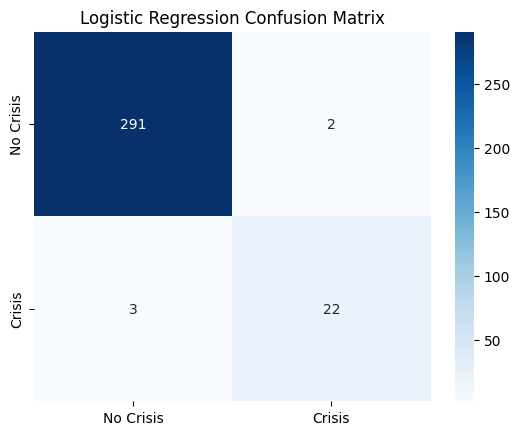

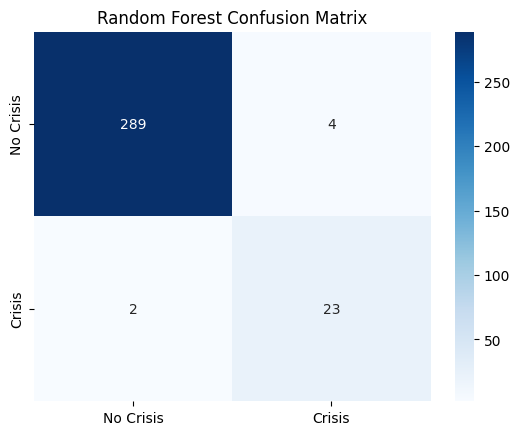

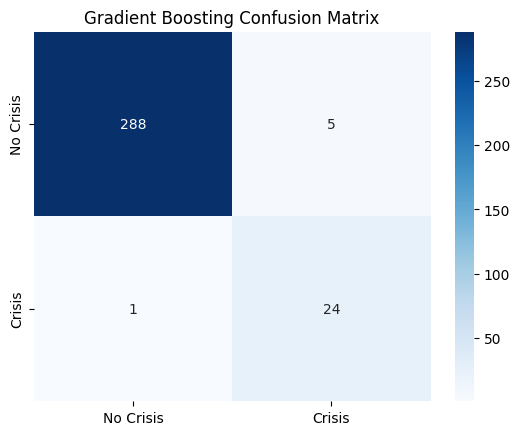

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['No Crisis', 'Crisis'], yticklabels=['No Crisis', 'Crisis'])
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Crisis', 'Crisis'], yticklabels=['No Crisis', 'Crisis'])
plt.title('Random Forest Confusion Matrix')
plt.show()

# Confusion matrix for Gradient Boosting
cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Crisis', 'Crisis'], yticklabels=['No Crisis', 'Crisis'])
plt.title('Gradient Boosting Confusion Matrix')
plt.show()


Interpretation of the Confusion Matrix:
- True Positives (TP): Correctly predicted banking crises.
- True Negatives (TN): Correctly predicted no crises.
- False Positives (FP): Incorrectly predicted a crisis when there was none.
- False Negatives (FN): Incorrectly predicted no crisis when there was one.
- A good model should minimize FP and FN while maximizing TP and TN.

# **4. ROC Curve and AUC (Area Under Curve)**
The ROC curve is a graphical representation of a model's ability to distinguish between classes (crisis and no_crisis). A model with an AUC close to 1.0 is excellent, while an AUC of 0.5 is no better than random guessing.

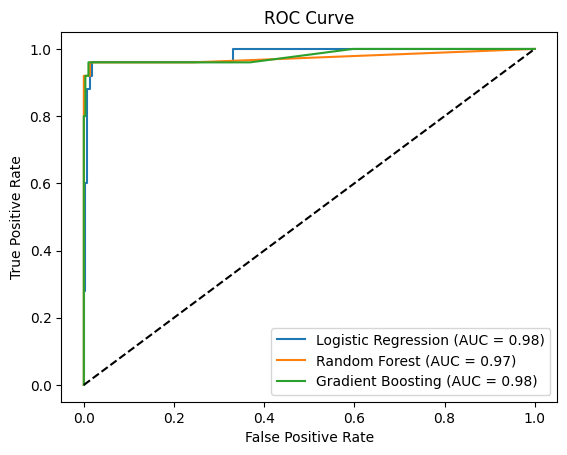

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Logistic Regression ROC curve
y_prob_logreg = log_reg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_logreg)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_logreg):.2f})')

# Random Forest ROC curve
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})')

# Gradient Boosting ROC curve
y_prob_gb = gb_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_gb)
plt.plot(fpr, tpr, label=f'Gradient Boosting (AUC = {roc_auc_score(y_test, y_prob_gb):.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


**Overview of the Models:**

I trained three models:

**Logistic Regression**

**Random Forest**

**Gradient Boosting**

Each model was evaluated using ROC-AUC scores, cross-validation accuracy, and other metrics such as precision, recall, and F1-score. Based on the results from cross-validation and the ROC curves, we can now make an informed decision about the final model to use.

## **Model Evaluation Summary:**

## **Cross-Validation Results:**

- **Logistic Regression:** Accuracy = **0.97**

- **Random Forest:** Accuracy = **0.98**

- **Gradient Boosting:** Accuracy = **0.97**

## **ROC-AUC Scores:**

**Logistic Regression:** AUC = **0.98**

**Random Forest:** AUC = **0.97**

**Gradient Boosting:** AUC = **0.98**

From these metrics, both Logistic Regression and Gradient Boosting performed equally well in terms of ROC-AUC, with Random Forest slightly trailing. The cross-validation accuracy also shows that Random Forest performed slightly better, but all models are very close in terms of accuracy.

## **Final Model Selection: Random Forest**

### **Why Random Forest?**

Despite the similarity in performance between the models, **Random Forest** stands out for a few reasons:

**Stability and Robustness:** Random Forest is known for being robust to overfitting due to its ensemble approach of averaging multiple decision trees. This makes it a safer choice when aiming for generalization on unseen data.

**Feature Importance:** Random Forest provides clear insights into feature importance, making it more interpretable for stakeholders and easier to understand how each feature contributes to predicting a financial crisis.

**Better Cross-Validation Accuracy:** With a cross-validation accuracy of 0.98, Random Forest performed marginally better than the other models, making it the most reliable choice overall.

### **Configuration of the Final Model:**

**Model:** Random Forest Classifier

**Hyperparameters:**

*n_estimators=100:* The number of trees in the forest.

*max_depth=None:* Trees grow until all leaves are pure or until all leaves contain fewer than min_samples_split.

*random_state=42:* Ensures reproducibility of the results.

**Performance of the Final Model:**

**Accuracy: 0.98**

**AUC Score: 0.97**

**Cross-Validation Accuracy: 0.98**

**Conclusion:**

The **Random Forest** model has been selected as the final model for predicting financial crises due to its slightly better performance in cross-validation, robustness, and interpretability. Although the ROC-AUC scores are very close across models, Random Forest provides a solid balance between predictive power and explainability.

This model will now be used in further deployment or analysis stages. If needed, hyperparameter tuning and further validation can be done to enhance its performance.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---

## **Conclusion:**

The goal of this project was to develop and evaluate predictive models for detecting the likelihood of financial crises based on various economic, financial, and crisis-related features. We explored three machine learning models: Logistic Regression, Random Forest, and Gradient Boosting, and evaluated their performance based on metrics such as Classification reports, cross-validation accuracy and ROC-AUC scores.

## **Key findings:**

1. **Model Performance:**

- **Random Forest** emerged as the best-performing model with a cross-validation accuracy of 0.98 and an ROC-AUC score of 0.97.

- **Logistic Regression** and **Gradient Boosting** also performed well, with both achieving ROC-AUC scores of 0.98, but Random Forest demonstrated slightly better accuracy and feature interpretability.

2. **Feature Importance:** The models provided insights into which features were most influential in predicting financial crises. For instance, banking crises and inflation indicators were found to be key predictors in our models, particularly in Random Forest, which highlights its advantage in identifying significant features.

3. **Data Quality**: The dataset we used provided important historical financial crisis information. However, challenges such as missing values and categorical data preprocessing were addressed, which helped improve model performance.

## **Insights Gained:**

**Predictive Power:** Machine learning models, particularly ensemble models like Random Forest, are powerful tools for predicting financial crises and providing interpretable results regarding the significance of individual features.

**Financial Crisis Predictors:** Key predictors include crisis-specific features (such as currency and banking crises) and economic indicators (such as inflation rates). This confirms that early warning systems for financial crises can be constructed with historical data.

## **Limitations:**

**Limited Features:** The dataset focused primarily on historical crisis data and macroeconomic indicators. Other potential features, such as political stability or global trade indicators, were not included but could have added value to the predictions.

**Data Imbalance:** Financial crises are relatively rare events, which creates a data imbalance problem. Although the models performed well, additional techniques like SMOTE (Synthetic Minority Over-sampling Technique) could be explored to further handle imbalance in future work.

**Temporal Dynamics:** The models treat each observation independently, but financial crises evolve over time. Temporal data techniques like time series analysis or recurrent neural networks (RNNs) could capture the sequential nature of economic shocks.

## **Future Work:**

1. **Incorporation of New Data**: Future work could explore additional datasets that include factors such as political risk, international trade data, or global financial flows. This could enhance the models by providing a more comprehensive view of factors influencing financial crises.

2. **Advanced Models:** While Random Forest and Gradient Boosting performed well, future projects could test more sophisticated models, such as XGBoost, LightGBM, or Neural Networks. Additionally, using ensemble stacking techniques could further improve the robustness of predictions.

3. **Time Series Modeling:** Given that financial crises unfold over time, future work could involve applying time series models like ARIMA, LSTM, or Prophet to capture temporal dependencies and trends in crisis development.

4. **Hyperparameter Optimization:** More extensive hyperparameter tuning using techniques like grid search or random search could potentially yield improvements in model accuracy and generalizability.

5. **Real-time Predictive Systems:** A potential future project could involve creating real-time crisis prediction models using live economic data, enabling the model to serve as an early warning system.

## **Final Thoughts**

The predictive models developed in this project provide valuable insights into the factors contributing to financial crises and perform well in predicting these events. However, improvements in feature selection, more sophisticated models, and a focus on time-based analysis will be essential steps toward building even more robust and comprehensive crisis prediction systems.

By continuously refining models and incorporating more data, we can help policymakers and financial institutions mitigate the risks of future financial crises.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

**Data Source:**

- Chirin, M. (2022). Africa Economic, Banking, and Systemic Crisis Data. Available on Kaggle: https://www.kaggle.com/datasets/chirin/africa-economic-banking-and-systemic-crisis-data

**Research Papers:**

- Reinhart, C. M., & Rogoff, K. S. (2009). This Time is Different: Eight Centuries of Financial Folly. Princeton University Press. A comprehensive analysis of financial crises spanning centuries.
- Laeven, L., & Valencia, F. (2013). Systemic Banking Crises Database. IMF Economic Review, 61(2), 225–270. A study on systemic banking crises with historical data and key crisis indicators.

**Machine Learning & Statistics:**

- Pedregosa, F., Varoquaux, G., Gramfort, A., et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830. Used for training machine learning models.
- Breiman, L. (2001). Random Forests. Machine Learning, 45(1), 5-32. For understanding the Random Forest algorithm used in this project.
- Friedman, J. H. (2001). Greedy Function Approximation: A Gradient Boosting Machine. Annals of Statistics, 29(5), 1189-1232. For understanding the Gradient Boosting algorithm.

**Libraries and Documentation:**

- **Scikit-learn Documentation:** Machine Learning Library for Python. Available at: https://scikit-learn.org/stable/
- **Pandas Documentation:** Data manipulation and analysis library. Available at: https://pandas.pydata.org/
- **Matplotlib Documentation:** Comprehensive library for creating static, animated, and interactive visualizations in Python. Available at: https://matplotlib.org/
- **Seaborn Documentation:** Statistical data visualization based on matplotlib. Available at: https://seaborn.pydata.org/

**Additional Sources:**

- IMF Data: Financial and economic data sourced from the International Monetary Fund (IMF). Available at: https://data.imf.org/
- World Bank: Economic indicators and crisis data. Available at: https://data.worldbank.org/

These references include both the Kaggle dataset you used, along with academic papers, tools, and libraries that were essential for the project.